In [ ]:
#ikinci el araba fiyat tahmini modeli

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
dataFrame = pd.read_excel("/content/drive/MyDrive/btk python-tensorflow/merc.xlsx")

In [ ]:
dataFrame.head() #tax: vergi    mpg: milde kaç yakıyor

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
dataFrame.isnull().count()

,0
year,13119
price,13119
transmission,13119
mileage,13119
tax,13119
mpg,13119
engineSize,13119


In [ ]:
#veya
dataFrame.isnull().sum()

,0
year,0
price,0
transmission,0
mileage,0
tax,0
mpg,0
engineSize,0


<ipython-input-11-0e0d4a7770e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"]) #distrubition plot dağılım grafiği


<Axes: xlabel='price', ylabel='Density'>

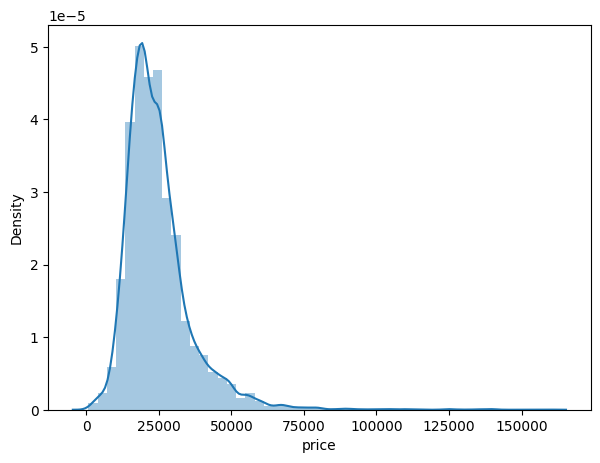

In [ ]:
plt.figure(figsize = (7,5))
sbn.distplot(dataFrame["price"]) #distrubition plot dağılım grafiği

In [ ]:
#veri setinin temizlenmesi gerekiyort.
#en pahalı arabalardan 10-15 tanesini/belli bir kısmını çıkartmamız gerekiyor.
#yoksa çok yüksek araba fiyatları nedeniyle model yüksek tahminlerde bulunabilir. bunu istemeyiz.

<Axes: xlabel='year', ylabel='count'>

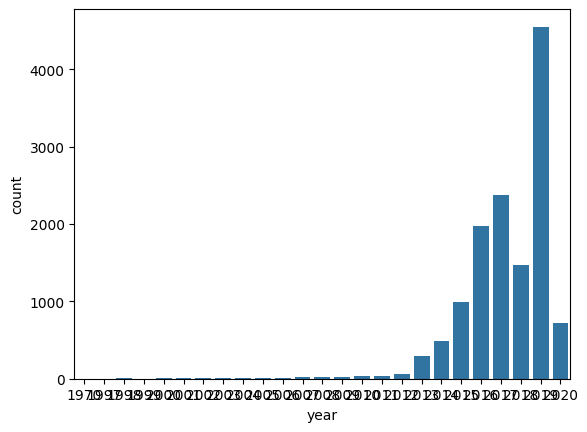

In [ ]:
sbn.countplot(x="year", data=dataFrame)

In [ ]:
#verisetindeki korelasyon
# dataFrame.corr()
# Calculate correlations for numeric columns only
dataFrame.corr(numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
dataFrame.corr(numeric_only=True)["price"].sort_values()
#değişken ağırlıkları -- hangi özelliğin fiyatı ne kadar etkilediği

,price
mileage,-0.537214
mpg,-0.438445
tax,0.268717
engineSize,0.516126
year,0.520712
price,1.000000


<Axes: xlabel='mileage', ylabel='price'>

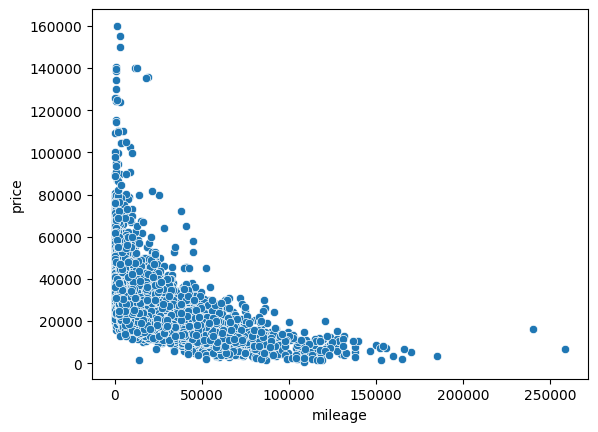

In [ ]:
sbn.scatterplot(x = "mileage",y = "price", data = dataFrame) #nokta grafiği

In [ ]:
dataFrame.sort_values("price",ascending = False).head(20) #en yüksekten düşüğe sıralama
#ascending: yükselen

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [ ]:
dataFrame.sort_values("price",ascending = True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [ ]:
len(dataFrame)

13119

In [ ]:
len(dataFrame)*0.01

131.19

In [ ]:
#verinin %99unu alalım. genel hatlarda değişiklik olmaz. yanıltıcı veriyi çıkartıyoruz.


In [ ]:
#en yüksek fiyatlı 131 fiyatlı arabayı bul ve verisetinden çıkart.

In [ ]:
yuzde99DF = dataFrame.sort_values("price",ascending = False).iloc[131: ]
#indexe göre yerini bul/sırala 131den sonrasından devam et
#Böylece komut, ilk 131 satır dışındaki sıralanmış DataFrame'deki tüm satırları döndürür ve
#en pahalı öğelerin en üstteki %1'lik kısmını etkili bir şekilde hariç tutar

In [ ]:
yuzde99DF.describe() #fiyat 25k civarındaydı 24e düşmüş, yık değişmemiş

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<ipython-input-25-f768d05a2816>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(yuzde99DF["price"])


<Axes: xlabel='price', ylabel='Density'>

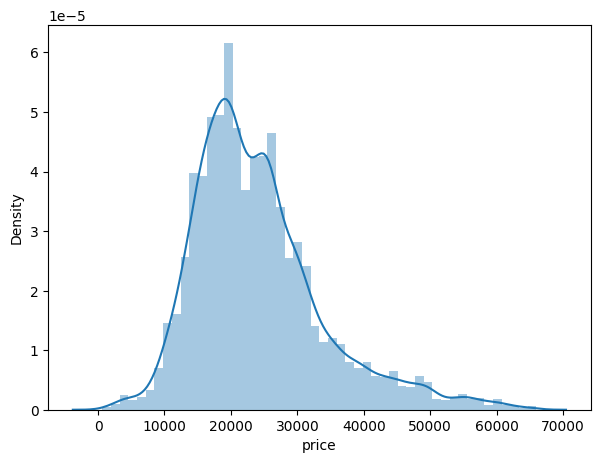

In [ ]:
plt.figure(figsize = (7,5))
sbn.distplot(yuzde99DF["price"])

In [ ]:
# dataFrame.groupby("year").mean()["price"] // jupyterlabda sorun çıkmıyor fkat burdaki sayısal olmaayn değerler sorun yaratıyor.

# Convert the 'price' column to numeric, handling non-numeric values
dataFrame['price'] = pd.to_numeric(dataFrame['price'], errors='coerce')

# Calculate the mean price per year
result = dataFrame.groupby("year")['price'].mean()

print(result)

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64


In [ ]:
# yuzde99DF.groupby("year").mean()["price"]

# Convert the 'price' column to numeric, handling non-numeric values
yuzde99DF['price'] = pd.to_numeric(yuzde99DF['price'], errors='coerce')

# Calculate the mean price per year
result = yuzde99DF.groupby("year")['price'].mean()

print(result)

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64


In [ ]:
#dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

#dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

# Convert the 'price' column to numeric, handling non-numeric values
dataFrame['price'] = pd.to_numeric(dataFrame['price'], errors='coerce')

# Filter out rows where 'year' is 1970
filtered_df = dataFrame[dataFrame.year != 1970]

# Calculate the mean price per year for the filtered DataFrame
result = filtered_df.groupby("year")['price'].mean()

print(result)

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64


In [ ]:
dataFrame = yuzde99DF

In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [ ]:
#dataFrame.groupby("year").mean()["price"]

dataFrame['price'] = pd.to_numeric(dataFrame['price'], errors='coerce')

# Now you can calculate the mean price per year
result = dataFrame[dataFrame.year != 1970].groupby("year")['price'].mean()

print(result)

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64


<ipython-input-32-2ef4331986a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['price'] = pd.to_numeric(dataFrame['price'], errors='coerce')


In [ ]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [ ]:
dataFrame = dataFrame.drop("transmission",axis = 1)

In [ ]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis = 1).values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
len(x_train)

9090

In [ ]:
len(x_test)

3897

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
#önceki örnekte burayı iki aşamada yapmıştık.önce modeli fit ettik sonra transform.
#fakat bunu yukarıdaki gibi tek seferde de yapabiliriz

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential  #model oluşturma
from tensorflow.keras.layers import Dense  #katman oluşturma

In [ ]:
x_train.shape #5 tane özellik(feature) var
#katmanları 5ten başlatmak iyi olur ama arttırabiliriz de.


(9090, 5)

In [ ]:
model = Sequential()

#5te çok iyi sonuç elde edilmedi bu nedenle 12 kullanıyoruz
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))




model.add(Dense(1))

model.compile(optimizer ="adam",loss = "mse")  # optimizer için rmsprop kulllanmıştık
#fakat adam algoritması çok daha iyi bir algoritma. daha verimli. bu nedenle burada onu kullanıyoruz.


In [ ]:
#model eğitimi
model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), batch_size= 250, epochs = 300, )#önceki bölümde y_trainden sonra direkt epochs = .. verip geçmiştik
#validation (doğrulama verisi) direkt burada verebiliriz.böylece eğitilirken valaidasyon yapılabiliyor.
#x_test,y_test kıyaslamasını daha kolay yapabiliyoruz.
#batch_size = gruplama (değeri çok önemli değil)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 667147328.0000 - val_loss: 688107328.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 675320064.0000 - val_loss: 688084544.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 679420224.0000 - val_loss: 687981760.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 673543040.0000 - val_loss: 687569152.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 660409152.0000 - val_loss: 686074112.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 673320896.0000 - val_loss: 681497792.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 663660096.0000 - val_loss: 669131072.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 658094208.0000 - val_loss: 638375872.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 611923264.0000 - val_loss: 573658496.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 535571104.0000 - val_loss: 4601

In [ ]:
kayipVerisi = pd.DataFrame(model.history.history)

In [ ]:
kayipVerisi.head()

,loss,val_loss
0,672148992.0,688107328.0
1,672133696.0,688084544.0
2,672083072.0,687981760.0
3,671867712.0,687569152.0
4,671053184.0,686074112.0


<Axes: >

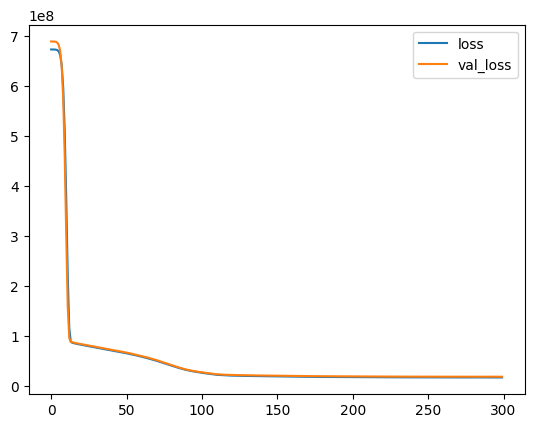

In [ ]:
kayipVerisi.plot()

In [ ]:
#grafikte sonlara doğru loss ve val_loss değerlerinde ayrılma,uzaklaşma görülüyorsa
#overfitting anlamına gelir. epoch düşürülmeli veya model yeniden kurgulanmalı.


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
tahminDizisi = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
tahminDizisi

array([[21949.87 ],
       [22644.506],
       [25081.19 ],
       ...,
       [26183.8  ],
       [12239.404],
       [24737.182]], dtype=float32)

In [ ]:
y_test

array([20995, 19791, 27791, ..., 20999, 15000, 26799])

In [ ]:
mean_absolute_error(y_test,tahminDizisi) #aradaki fark

3102.627501172777

In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
#ortalama fiyat 24074. sapma miktarı 3137 pound. yaklaşık %13lük fark var.
#bu sapma kabul edilebilir mi?
#edilemezse veriyi temizle,epoch arttır,katman nöron sayısı değiştir,test_size split_size değiştirebilrizi.
#fakat overfittinge dikkat etmeliyiz..

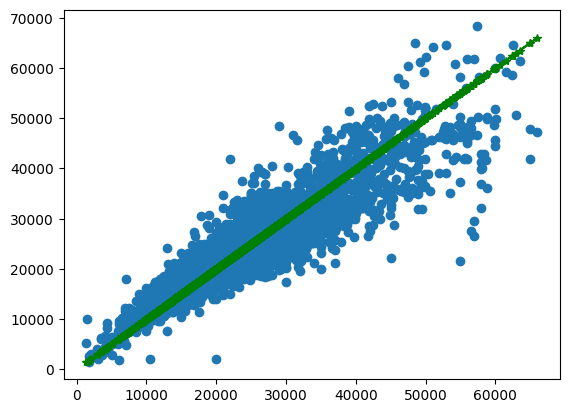

In [ ]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [ ]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [ ]:
dataFrame.iloc[2]

,3191
year,2020.0
price,65980.0
mileage,3999.0
tax,145.0
mpg,28.0
engineSize,4.0


In [ ]:
yeniArabaSeries = dataFrame.drop("price",axis =1).iloc[2]

In [ ]:
yeniArabaSeries

,3191
year,2020.0
mileage,3999.0
tax,145.0
mpg,28.0
engineSize,4.0


In [ ]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [ ]:
model.predict(yeniArabaSeries) #gerçek fiyatı 65980miş biz 63474 bulduk.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[62934.02]], dtype=float32)